# Разведочный анализ данных. Исследование и визуализация данных.

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('laptop_price - dataset.csv', sep=",")

# 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
# Размер датасета -  1275 строк, 15 колонок
data.shape

(1275, 15)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1275


In [6]:
# Список колонок
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [10]:
# Список колонок с типами данных
data.dtypes

Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
CPU_Company             object
CPU_Type                object
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Company - 0
Product - 0
TypeName - 0
Inches - 0
ScreenResolution - 0
CPU_Company - 0
CPU_Type - 0
CPU_Frequency (GHz) - 0
RAM (GB) - 0
Memory - 0
GPU_Company - 0
GPU_Type - 0
OpSys - 0
Weight (kg) - 0
Price (Euro) - 0


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [15]:
# Определим уникальные значения для целевого признака
data['Price (Euro)'].unique()

array([1339.69,  898.94,  575.  , 2537.45, 1803.6 ,  400.  , 2139.97,
       1158.7 , 1495.  ,  770.  ,  393.9 ,  344.99, 2439.97,  498.9 ,
       1262.4 , 1518.55,  745.  , 2858.  ,  499.  ,  979.  ,  191.9 ,
        999.  ,  258.  ,  819.  ,  659.  ,  418.64, 1099.  ,  800.  ,
       1298.  ,  896.  ,  244.99,  199.  ,  439.  , 1869.  ,  998.  ,
        249.  ,  367.  ,  488.69,  879.  ,  389.  , 1499.  ,  522.99,
        682.  , 1419.  ,  369.  , 1299.  ,  639.  ,  466.  ,  319.  ,
        841.  ,  398.49, 1103.  ,  384.  ,  767.8 ,  586.19, 2449.  ,
        415.  ,  599.  ,  941.  ,  690.  , 1983.  ,  438.69,  229.  ,
        549.  ,  949.  , 1089.  ,  955.  ,  870.  , 1095.  ,  519.  ,
        855.  ,  530.  ,  977.  , 1096.16, 1510.  ,  860.  ,  399.  ,
        395.  , 1349.  ,  699.  ,  598.99, 1449.  , 1649.  ,  689.  ,
       1197.  , 1195.  , 1049.  ,  847.  ,  599.9 ,  485.  ,  577.  ,
       1249.  ,  719.  ,  349.  ,  647.  , 1119.  , 1340.  ,  414.9 ,
       1193.  , 1480

Целевой признак является дискретной непрервный(?) и содержит только значения 174 и 6099.

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

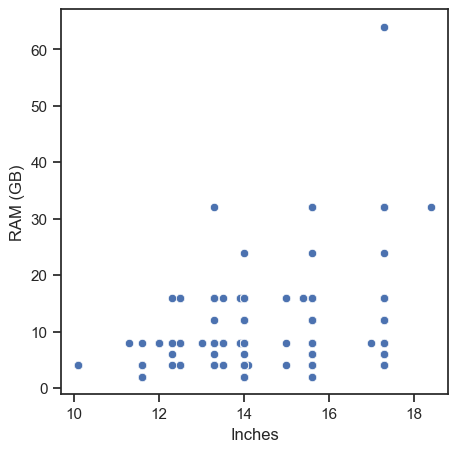

In [36]:

# Построение графика
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='Inches', y='RAM (GB)', data=data)

# Отображение графика
plt.show()


Можно видеть что между полями Inches и RAM пристутствует слабая (хаотичная) зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

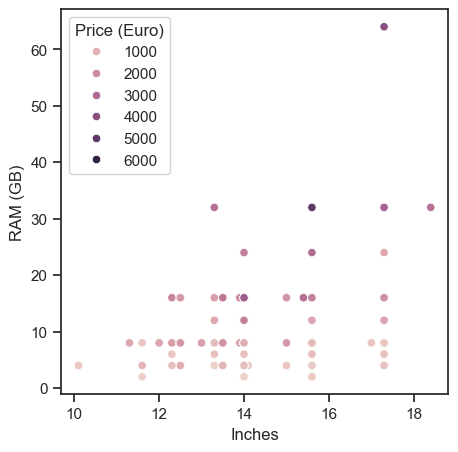

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='Inches', y='RAM (GB)', hue='Price (Euro)', data=data)
plt.show()


## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

C:\Users\kayat\AppData\Local\Temp\ipykernel_3360\2561556947.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RAM (GB)'])


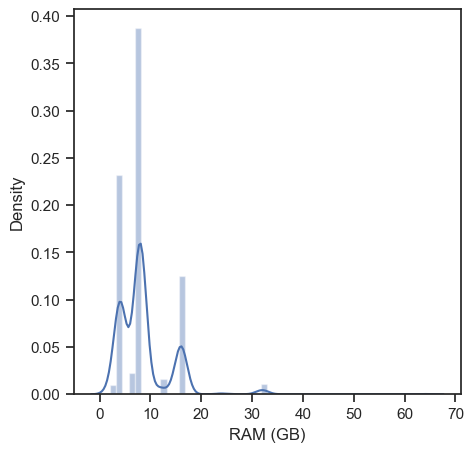

In [44]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['RAM (GB)'])
plt.show()

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

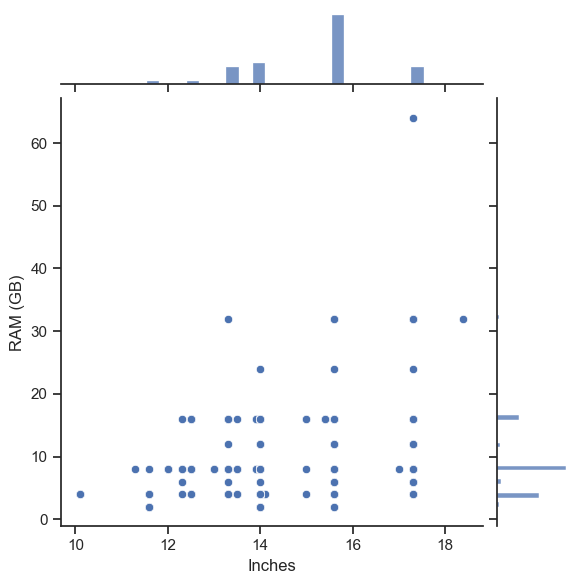

In [47]:
sns.jointplot(x='Inches', y='RAM (GB)', data=data)
plt.show()

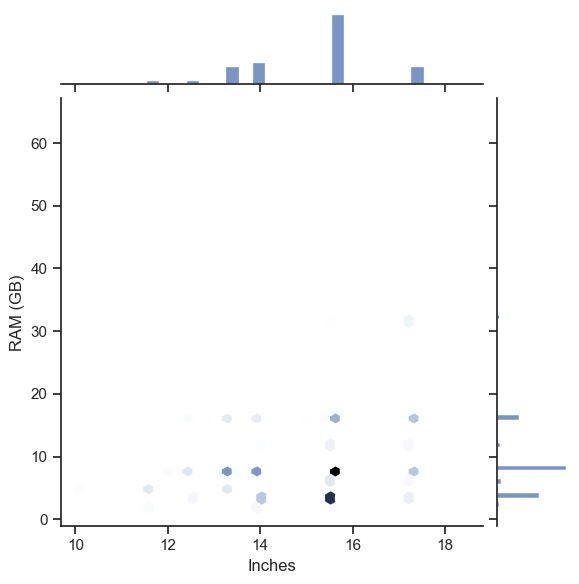

In [48]:
sns.jointplot(x='Inches', y='RAM (GB)', data=data, kind="hex")
plt.show()

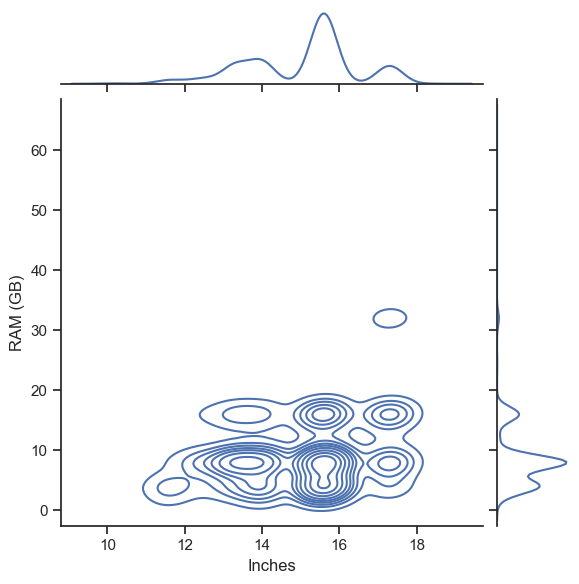

In [51]:
sns.jointplot(x='Inches', y='RAM (GB)', data=data, kind="kde")
plt.show()

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

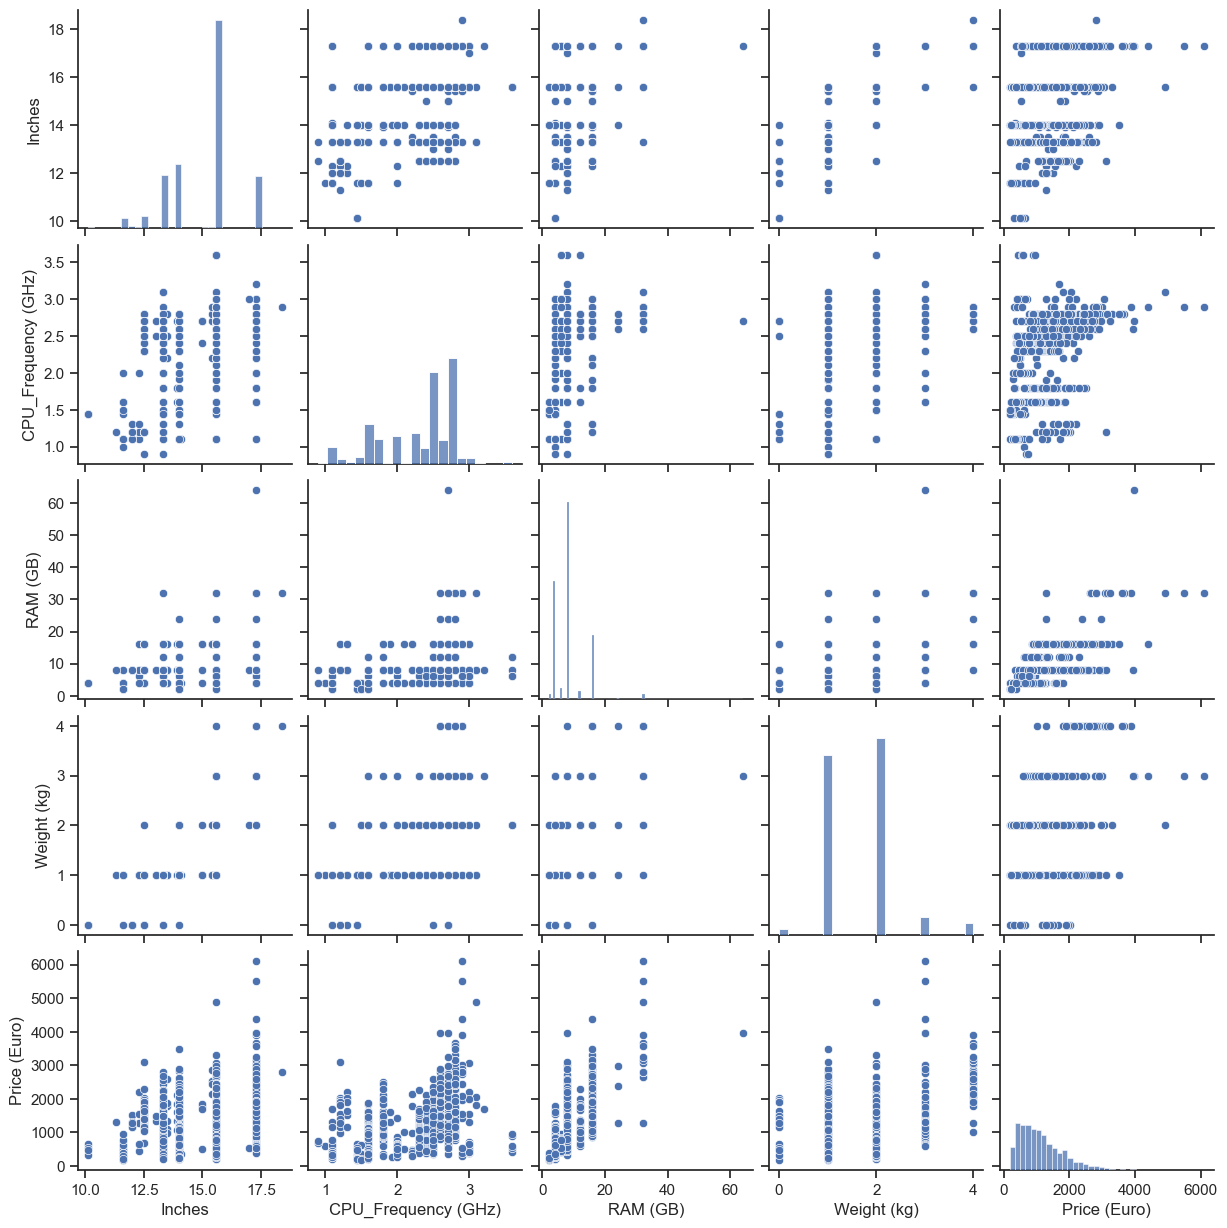

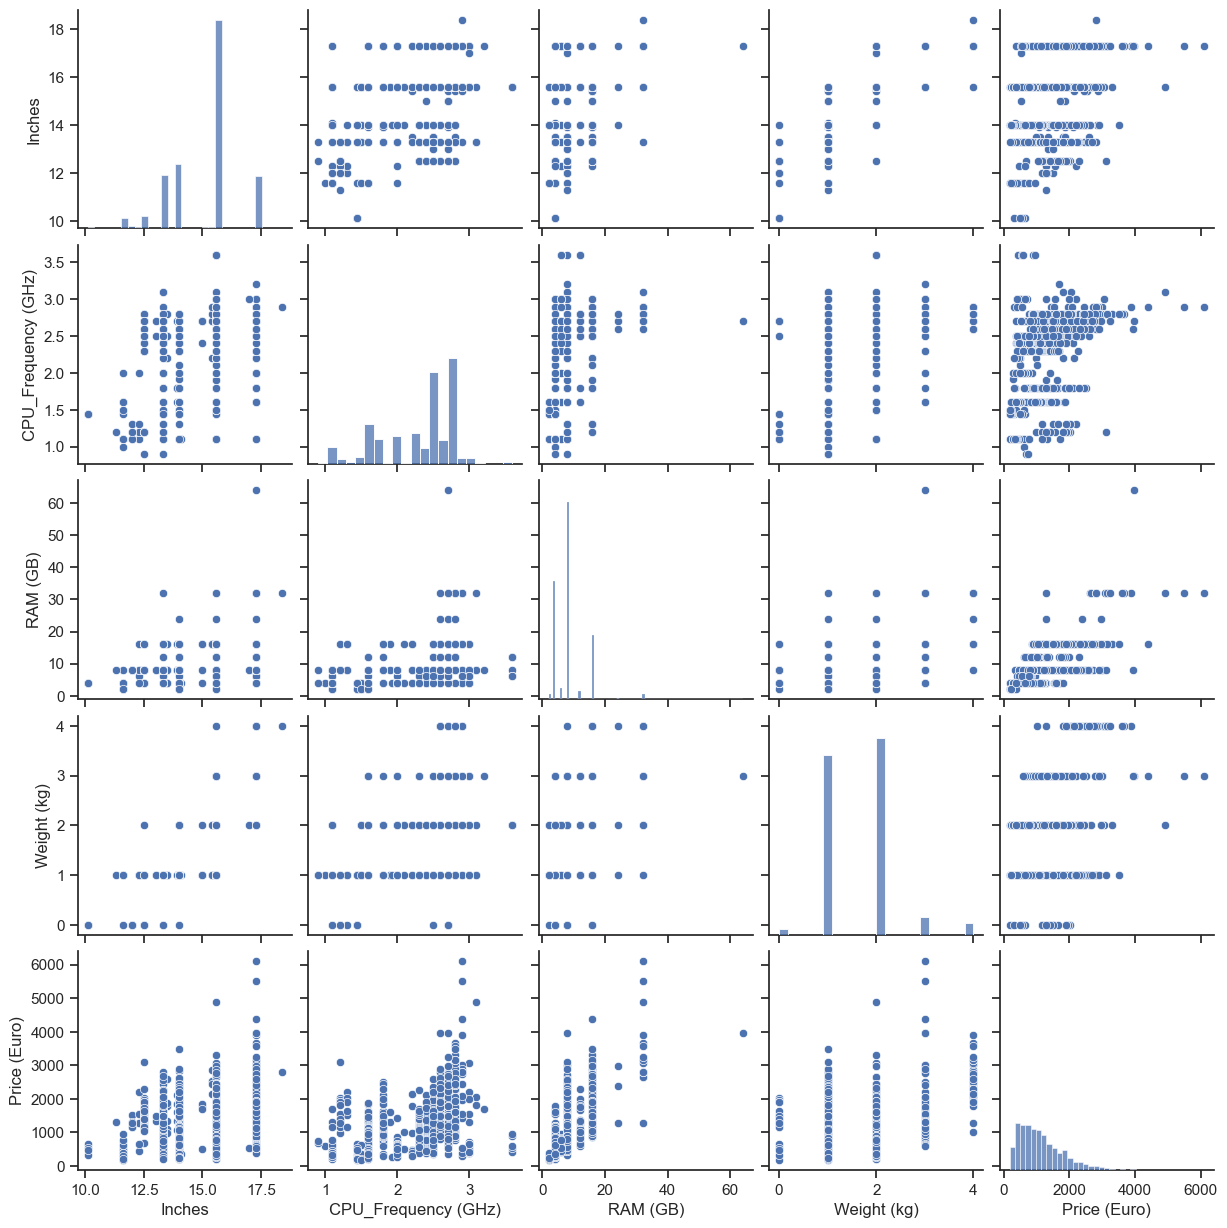

In [53]:
sns.pairplot(data)
plt.show()

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

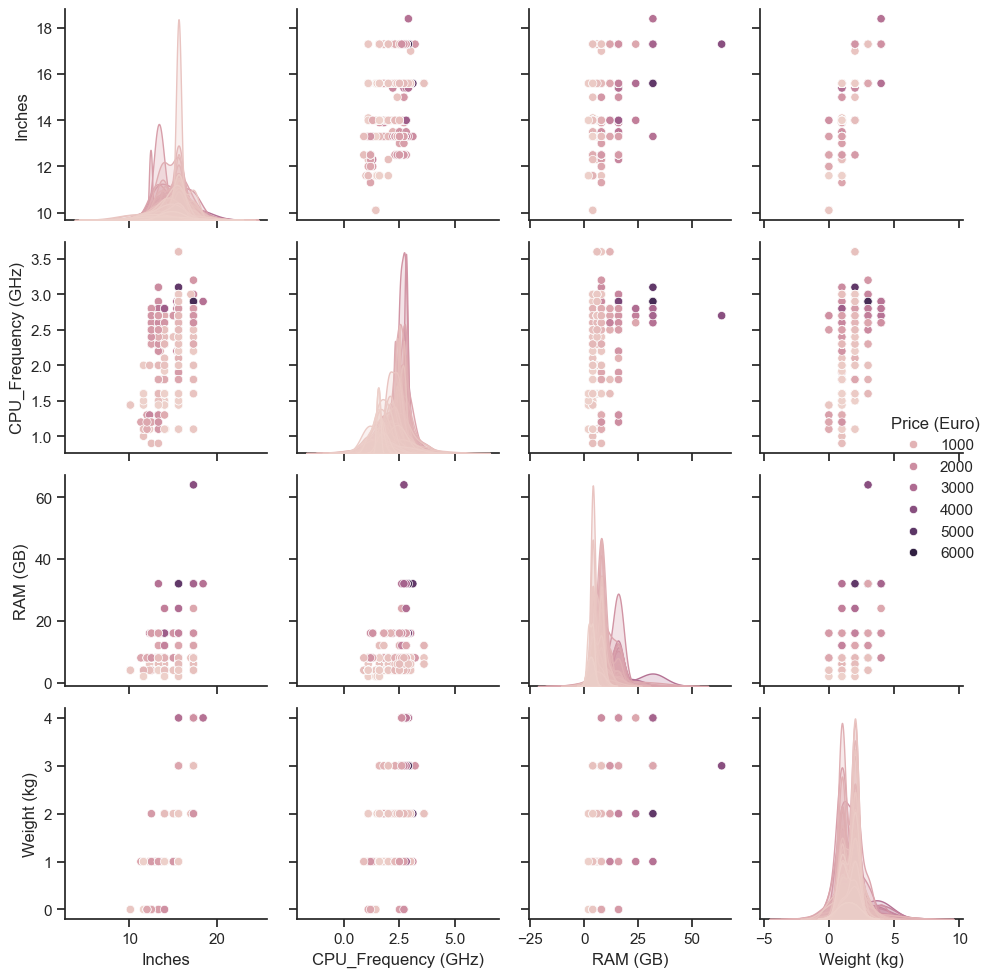

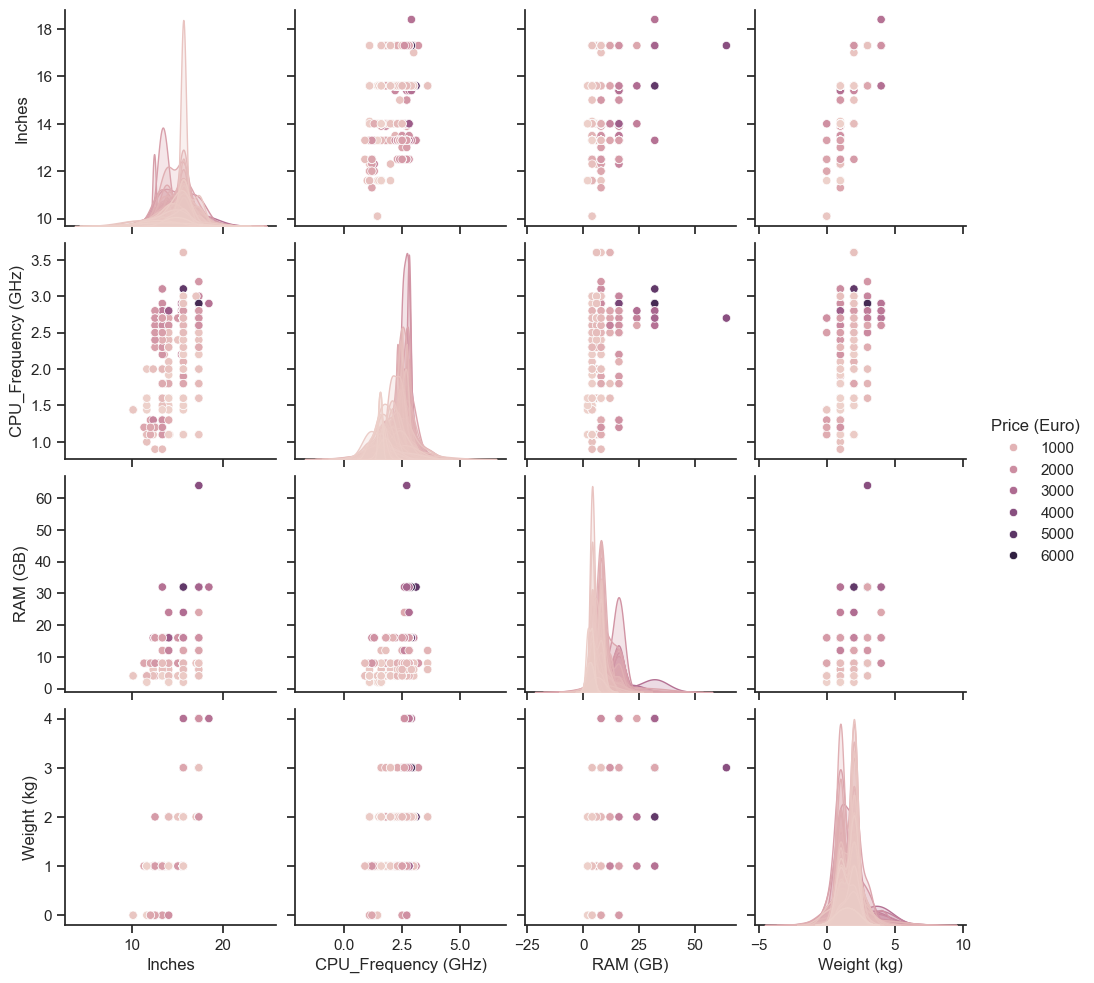

In [55]:
sns.pairplot(data, hue="Price (Euro)")
plt.show()

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

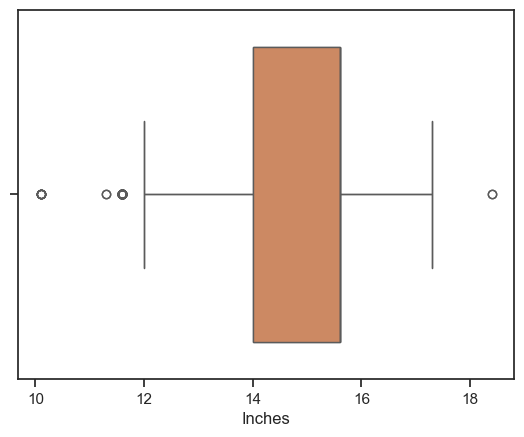

In [57]:
sns.boxplot(x=data['Inches'])
plt.show()

<AxesSubplot:ylabel='Humidity'>

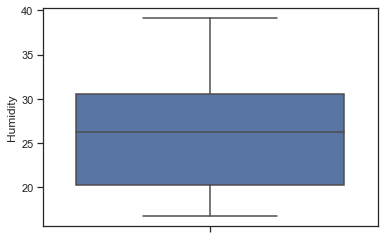

In [20]:
# По вертикали
sns.boxplot(y=data['Humidity'])

<AxesSubplot:xlabel='Occupancy', ylabel='Humidity'>

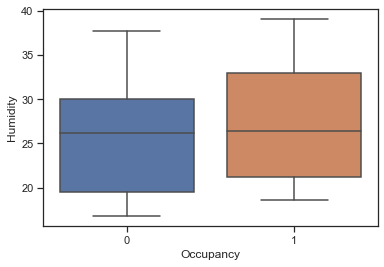

In [21]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Occupancy', y='Humidity', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<AxesSubplot:xlabel='Humidity'>

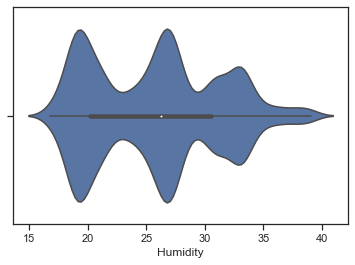

In [22]:
sns.violinplot(x=data['Humidity'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

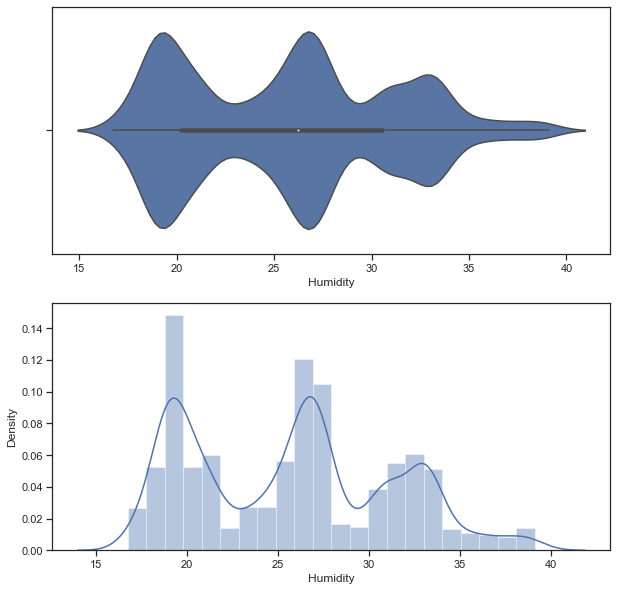

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Humidity'])
sns.distplot(data['Humidity'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='Occupancy', ylabel='Humidity'>

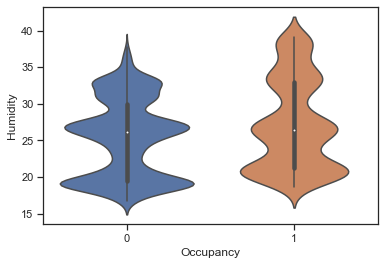

In [24]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Occupancy', y='Humidity', data=data)

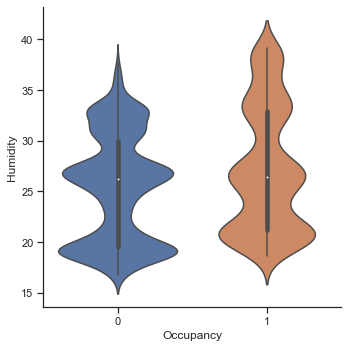

In [25]:
sns.catplot(y='Humidity', x='Occupancy', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [26]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с освещенностью (0.9) и концентрацией углекислого газа (0.71). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с температурой (0.54). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с влажностью (0.13) и HumidityRatio (0.3). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- Влажность и HumidityRatio очень сильно коррелируют между собой (0.96). Это неудивительно, ведь HumidityRatio величина производная от влажности. Поэтому из этих признаков в модели можно оставлять только один. 
- Также можно сделать вывод, что выбирая из признаков влажность и HumidityRatio лучше выбрать HumidityRatio, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.13 и 0.3 являются довольно малыми величинами. 

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [27]:
data.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


In [28]:
data.corr(method='kendall')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.110486,0.415524,0.454057,0.085116,0.439836
Humidity,-0.110486,1.000000,0.000452,0.169497,0.808515,0.105824
Light,0.415524,0.000452,1.000000,0.337398,0.130087,0.734405
CO2,0.454057,0.169497,0.337398,1.000000,0.271553,0.537307
HumidityRatio,0.085116,0.808515,0.130087,0.271553,1.000000,0.209033
Occupancy,0.439836,0.105824,0.734405,0.537307,0.209033,1.000000


In [29]:
data.corr(method='spearman')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.193389,0.565237,0.636906,0.104765,0.532830
Humidity,-0.193389,1.000000,0.007065,0.223519,0.940327,0.129235
Light,0.565237,0.007065,1.000000,0.473103,0.169057,0.804645
CO2,0.636906,0.223519,0.473103,1.000000,0.378357,0.656651
HumidityRatio,0.104765,0.940327,0.169057,0.378357,1.000000,0.255836
Occupancy,0.532830,0.129235,0.804645,0.656651,0.255836,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

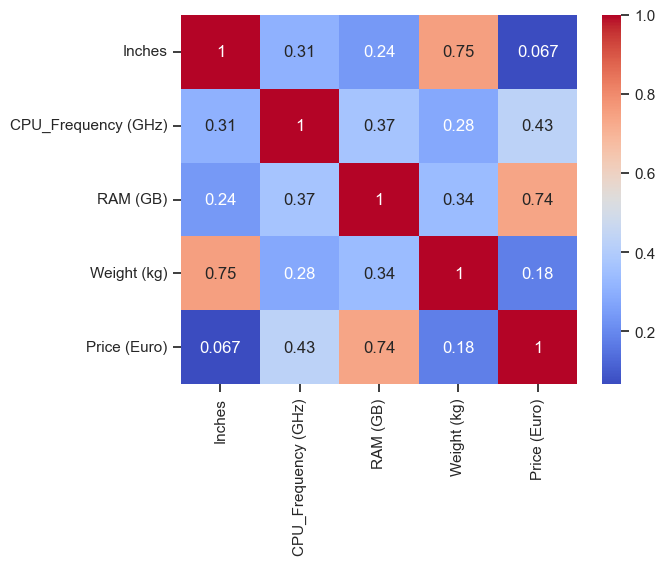

In [59]:

numeric_data = data.select_dtypes(include=['number'])  # Выбираем только числовые столбцы
correlation_matrix = numeric_data.corr()  # Рассчитываем матрицу корреляции

# Создаем тепловую карту
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()  # Отображаем график

<AxesSubplot:>

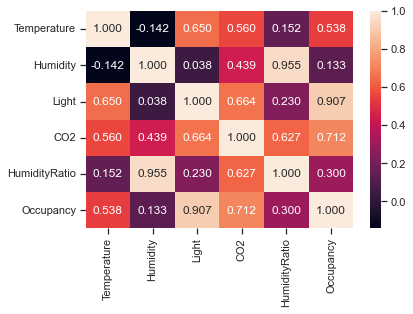

In [31]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

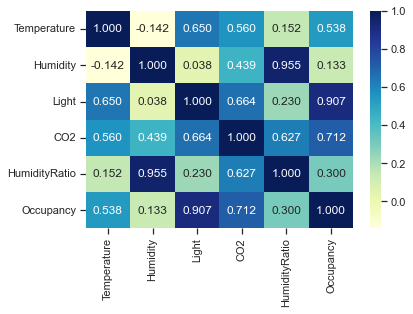

In [32]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

C:\Users\Paladin\AppData\Local\Temp/ipykernel_5400/3444845879.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

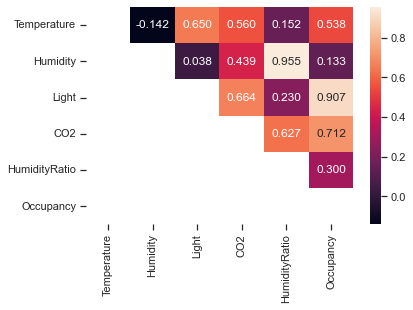

In [33]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

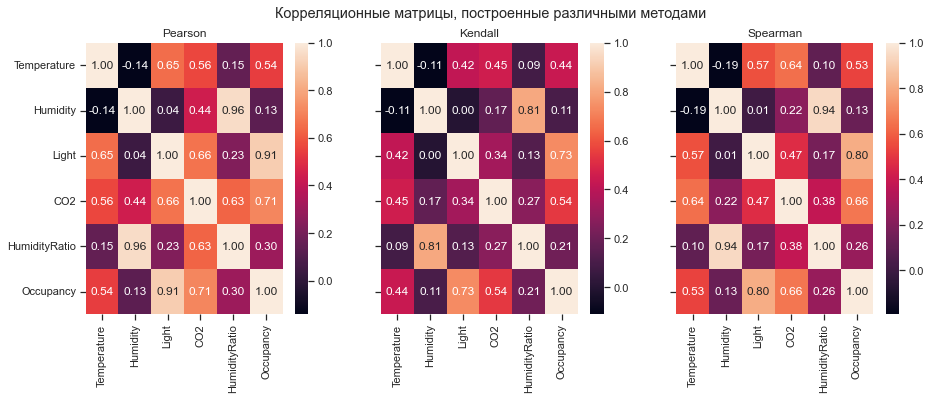

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<AxesSubplot:>

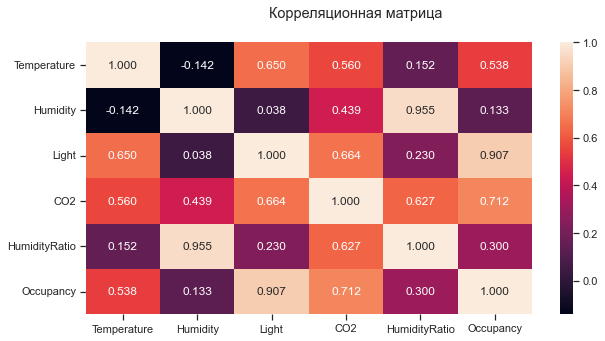

In [35]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)